In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io


import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D,Input
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Model

2025-05-01 18:39:55.002077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746124795.264804      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746124795.335099      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


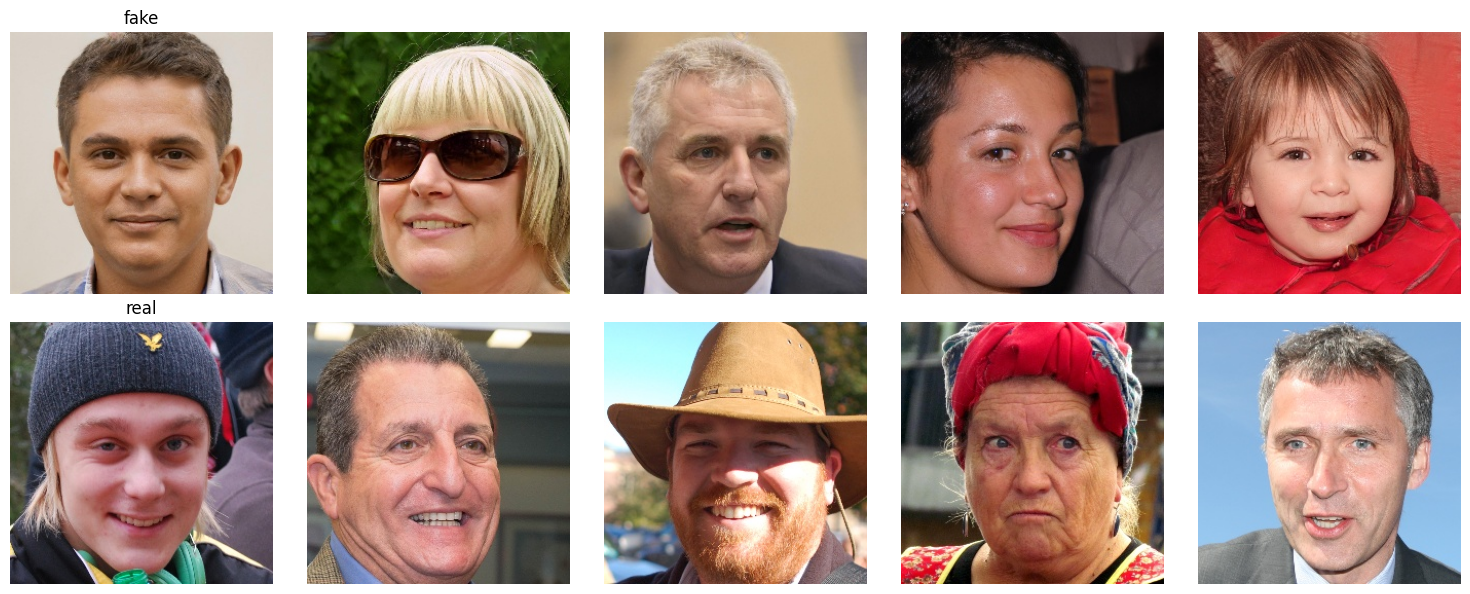

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


I0000 00:00:1746125579.592763      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746125579.593525      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,515,713 (24.86 MB)

 Trainable params: 6,515,713 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746125585.624082     131 service.cc:148] XLA service 0x7dcde8005560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746125585.626469     131 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746125585.626494     131 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746125586.015755     131 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746125589.186215     131 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of th

3125/3125 - 685s - 219ms/step - accuracy: 0.7526 - loss: 0.4940 - val_accuracy: 0.8277 - val_loss: 0.3973
Epoch 2/10
3125/3125 - 281s - 90ms/step - accuracy: 0.8607 - loss: 0.3232 - val_accuracy: 0.8653 - val_loss: 0.3116
Epoch 3/10
3125/3125 - 214s - 69ms/step - accuracy: 0.8985 - loss: 0.2443 - val_accuracy: 0.8983 - val_loss: 0.2463
Epoch 4/10
3125/3125 - 202s - 65ms/step - accuracy: 0.9207 - loss: 0.1951 - val_accuracy: 0.9089 - val_loss: 0.2232
Epoch 5/10
3125/3125 - 209s - 67ms/step - accuracy: 0.9347 - loss: 0.1615 - val_accuracy: 0.9166 - val_loss: 0.2062
Epoch 6/10
3125/3125 - 205s - 66ms/step - accuracy: 0.9459 - loss: 0.1353 - val_accuracy: 0.9235 - val_loss: 0.2020
Epoch 7/10
3125/3125 - 202s - 65ms/step - accuracy: 0.9557 - loss: 0.1121 - val_accuracy: 0.9280 - val_loss: 0.1993
Epoch 8/10
3125/3125 - 211s - 68ms/step - accuracy: 0.9635 - loss: 0.0928 - val_accuracy: 0.9265 - val_loss: 0.2078
Epoch 9/10
3125/3125 - 218s - 70ms/step - accuracy: 0.9703 - loss: 0.0775 - val_ac

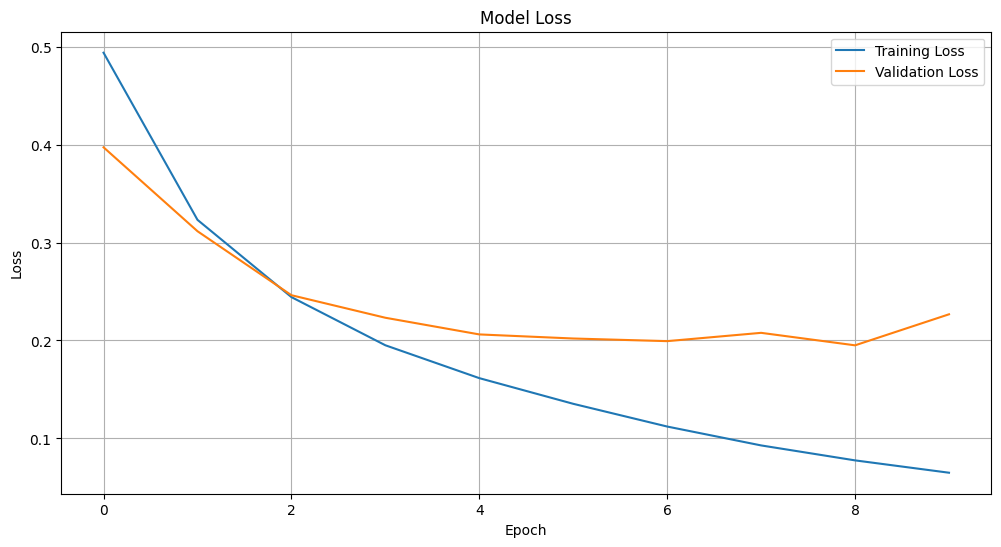

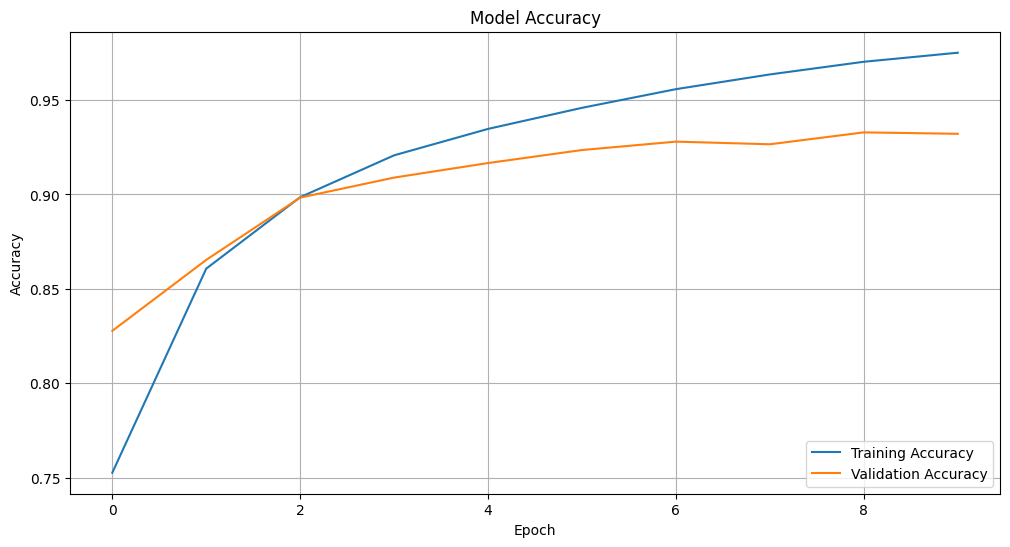

625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 274ms/step
Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.91      0.93     10000
        real       0.91      0.96      0.93     10000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



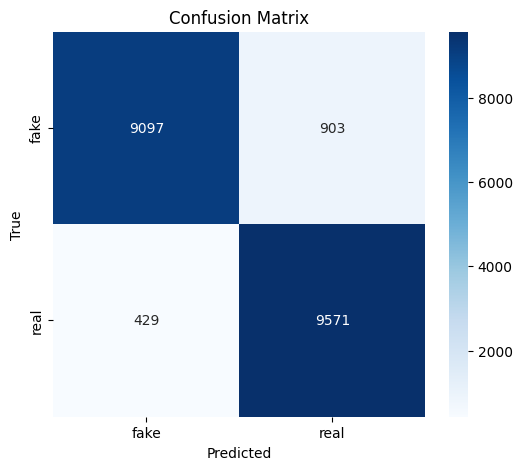

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Corrected root directory paths
root = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/'
train_dir = os.path.join(root, 'train')
val_dir = os.path.join(root, 'valid')
test_dir = os.path.join(root, 'test')

# ✅ Display sample images
class_names = ['fake', 'real']
num_images = 5

plt.figure(figsize=(15, 6))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    for j in range(num_images):
        img_path = os.path.join(class_dir, images[j])
        img = io.imread(img_path)
        plt.subplot(len(class_names), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.title(class_name if j == 0 else "")
        plt.axis('off')
plt.tight_layout()
plt.show()

# ✅ Data generators
data_gen = ImageDataGenerator(rescale=1.0/255)
target_size = (128, 128)
batch_size = 32

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary'
)

val_generator = data_gen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary'
)

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)

# ✅ CNN model definition
model = Sequential([
    Input(shape=(128, 128, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

# ✅ Compile and train
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=2)

# ✅ Plotting loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ✅ Evaluation: Precision, Recall, F1-Score, Confusion Matrix
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
